# Part I - Flights
## by Abdullah S. Othman

## Introduction
This dataset contains detailed flight information for airlines in the United States. It includes various fields like flight times, delays, origin and destination airports, and carrier information from 2000.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
Flights_df = pd.read_csv("airline_2m.csv", encoding='ISO-8859-1')
Flights_df = Flights_df[Flights_df['Year'] > 2000]
Flights_df.head()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7488\3399448150.py:1: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  Flights_df = pd.read_csv("airline_2m.csv", encoding='ISO-8859-1')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,3,8,7,1,2006-08-07,CO,19704,CO,N27724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Flights_df.info

<bound method DataFrame.info of          Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
1        2009        2      5          28          4  2009-05-28   
2        2013        2      6          29          6  2013-06-29   
3        2010        3      8          31          2  2010-08-31   
4        2006        1      1          15          7  2006-01-15   
6        2006        3      8           7          1  2006-08-07   
...       ...      ...    ...         ...        ...         ...   
1999994  2017        4     12          27          3  2017-12-27   
1999995  2008        1      3          23          7  2008-03-23   
1999997  2003        4     11          14          5  2003-11-14   
1999998  2012        2      5          15          2  2012-05-15   
1999999  2003        2      4          29          2  2003-04-29   

        Reporting_Airline  DOT_ID_Reporting_Airline  \
1                      FL                     20437   
2                      MQ                

In [4]:
def plot_label(title ,x_label,y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


### What is the structure of your dataset?

the shape (1280423, 109) dtypes: float64(72), int64(18), object(19)

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is the arrival delay, as I aim to analyze the factors contributing to flight delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect features like flight date, departure time, origin airport, and carrier to be influential in understanding the patterns behind flight delays.

## Univariate Exploration


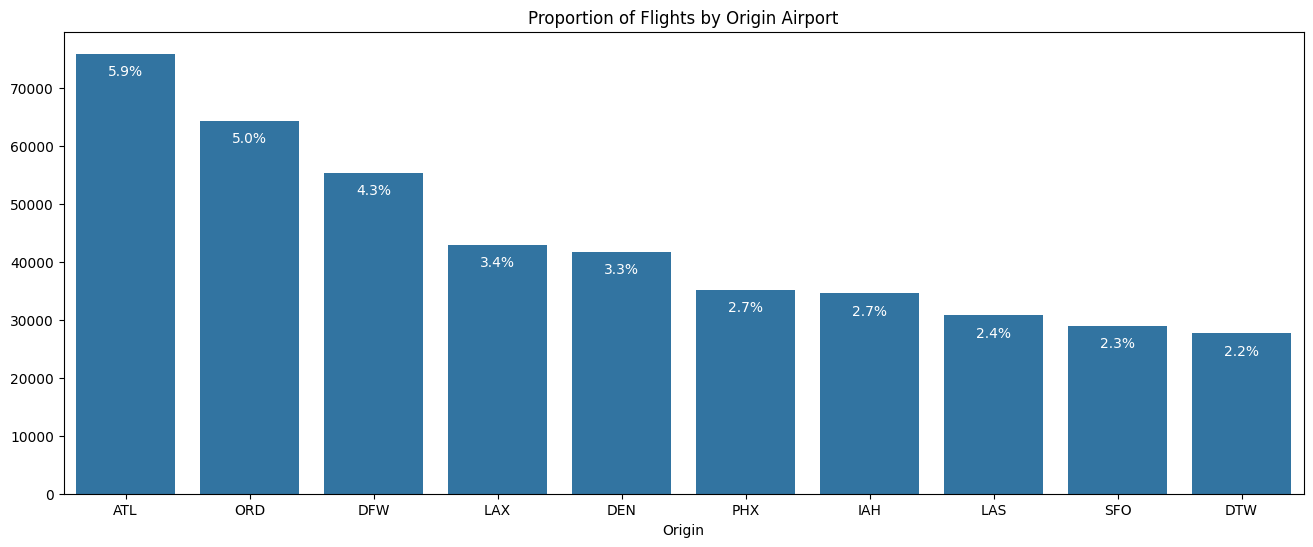

In [5]:
plt.figure(figsize=(16, 6))

# Set the base color for the bars
base_color = sb.color_palette()[0]

# Get the top 10 origins by flight count
top_origin = Flights_df['Origin'].value_counts().head(10)

# Plot the bar chart
sb.barplot(x=top_origin.index, y=top_origin.values, color=base_color)

# Add annotations
n_points = Flights_df.shape[0]  # Total number of data points
gen_counts = Flights_df['Origin'].value_counts()  # Count of each origin

# Get current tick locations and labels
locs, labels = plt.xticks()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = gen_counts[label.get_text()]  # Get the count for each label
    pct_string = f'{100 * count / n_points:0.1f}%'  # Calculate percentage
    # Annotate the bar with the percentage
    plt.text(loc, count - 0.05 * max(gen_counts.values), pct_string, ha='center', color='w')

# Set the plot title
plot_label('Proportion of Flights by Origin Airport',"Origin","")

ATL is the busiest airport having 5.9% of total flights.

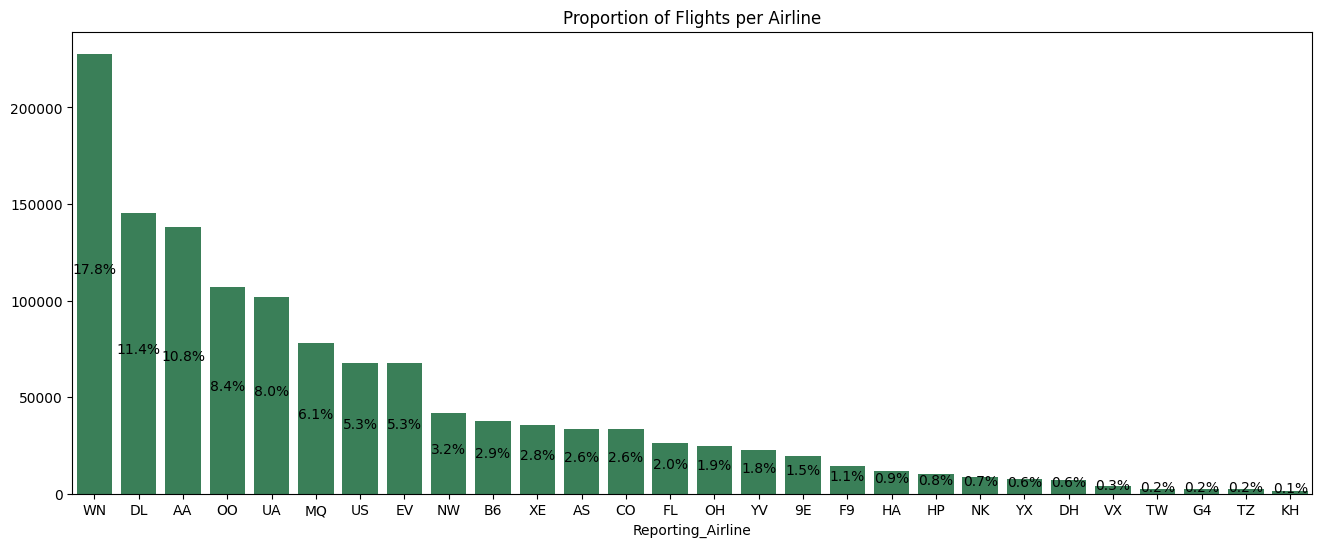

In [6]:
plt.figure(figsize=(16, 6))

# Set the base color for the bars
base_color = 'seagreen'

# Get the count of flights per airline (Reporting_Airline)
top_origin = Flights_df['Reporting_Airline'].value_counts()

# Plot the bar chart
sb.barplot(x=top_origin.index, y=top_origin.values, color=base_color)

# Add annotations
n_points = Flights_df.shape[0]  # Total number of data points
gen_counts = Flights_df['Reporting_Airline'].value_counts()  # Count of each airline

# Get current tick locations and labels
locs, labels = plt.xticks()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = gen_counts[label.get_text()]  # Get the count for each label
    pct_string = f'{100 * count / n_points:0.1f}%'  # Calculate percentage

    # Annotate the bar inside the bar itself with black text color
    plt.text(loc, count * 0.5, pct_string, ha='center', color='black', fontsize=10)


plot_label('Proportion of Flights per Airline',"Reporting_Airline","")



WN airline has the maximum flights (17.8%) followed by DL (11.4%).

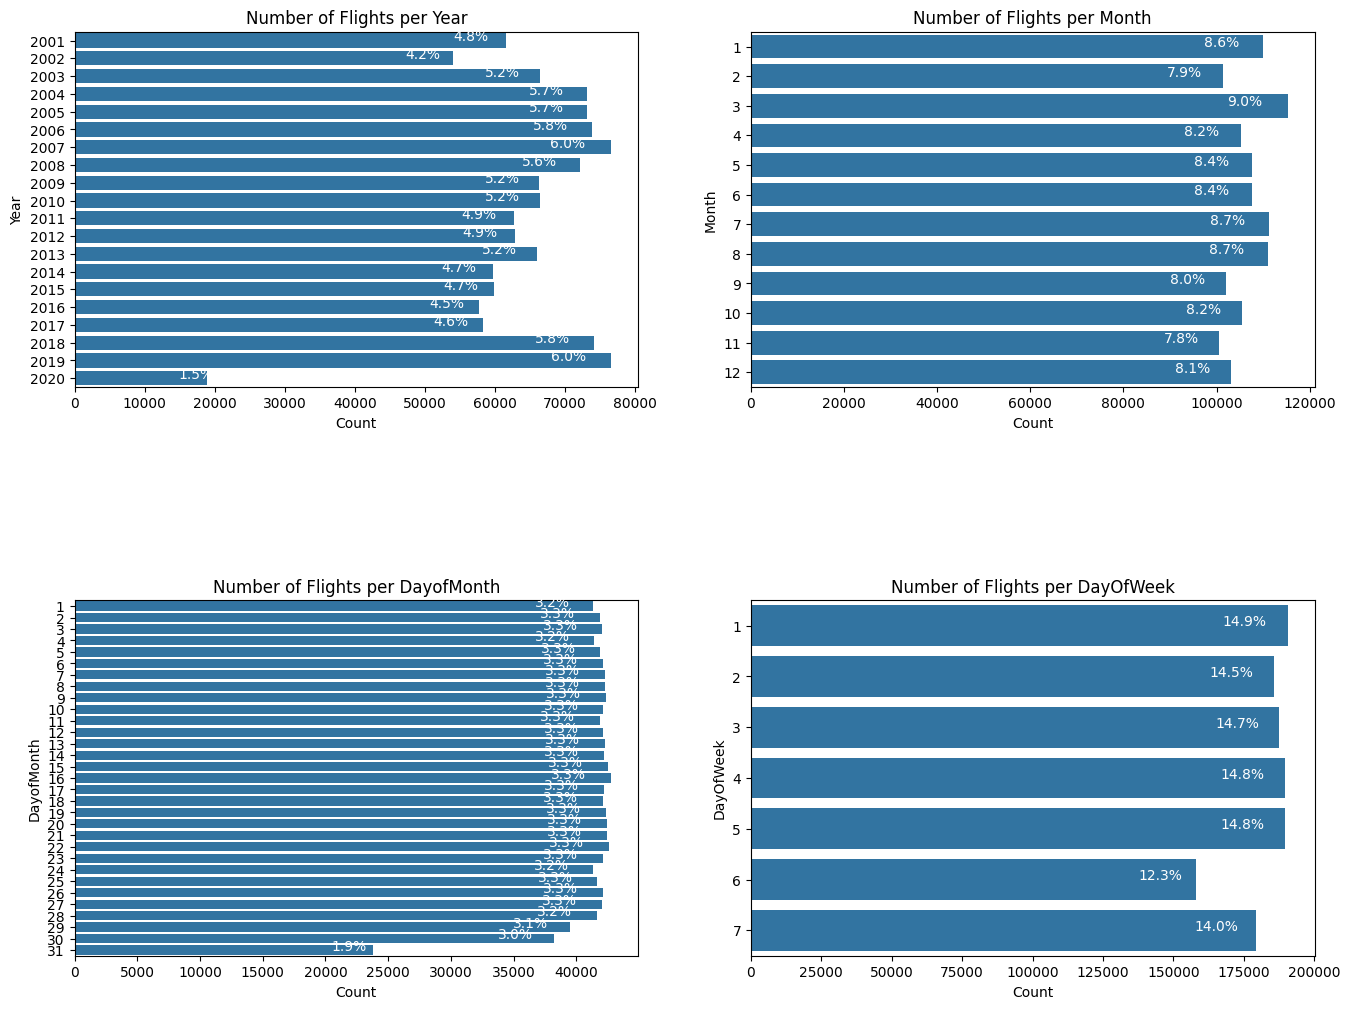

In [7]:

# Create the main figure
plt.figure(figsize=(16, 12))

# Adjust space between subplots
plt.subplots_adjust(hspace=0.6)

# Set the base color for the bars
base_color = sb.color_palette()[0]

# Get the total number of data points
n_points = Flights_df.shape[0]

# Loop through the categorical features to create subplots
for i, j in enumerate(['Year', 'Month', 'DayofMonth', 'DayOfWeek']):
    plt.subplot(2, 2, i+1)
    sb.countplot(data=Flights_df, y=j, color=base_color)

    # Get the counts for each category
    gen_counts = Flights_df[j].value_counts()
    locs, labels = plt.yticks()  # Get the current tick locations and labels

    # Loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        label_text = label.get_text()
        
        # Handle the case where labels might be strings
        count = gen_counts[int(label_text)] if label_text.isdigit() else gen_counts[label_text]
        pct_string = f'{100 * count / n_points:0.1f}%'

        # Annotate the bar with the percentage
        plt.text(0.92 * count, loc, pct_string, ha='center', color='white')

    # Set the title for each subplot
    plot_label(f'Number of Flights per {j}',"Count",j)




2007 and 2019 has the most flights. while 2020 have the lowest flights may it becuse of covid 19.

Minimum number of flights seems to be on 31st, but this is biased as only half of the months contains 31 days. Except on 29th, 30th and 31st, the number of flights is approximately same.

As shown in the Number of flights per DayOfWeek graph, Saturday (label 6) followed by Sunday (label 7) has the minimum number of flights.

#### Cancelled flights
How many flights were cancelled?

How the cancelled flights are distributed by reason of cancellation?

Text(0.5, 1.0, 'Proportion of Cancelled flights\n')

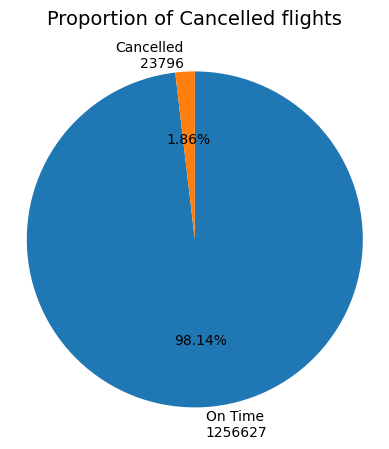

In [8]:
cancelled_flights = Flights_df['Cancelled'].value_counts()
labels = f'On Time\n{cancelled_flights.values[0]}', f'Cancelled\n{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%')
plt.axis('square')
plt.title('Proportion of Cancelled flights\n', fontsize=14)

Out of 1.2 million flights from Jan 2000 to Apr 2024, 23k flights (1.86%) were cancelled.


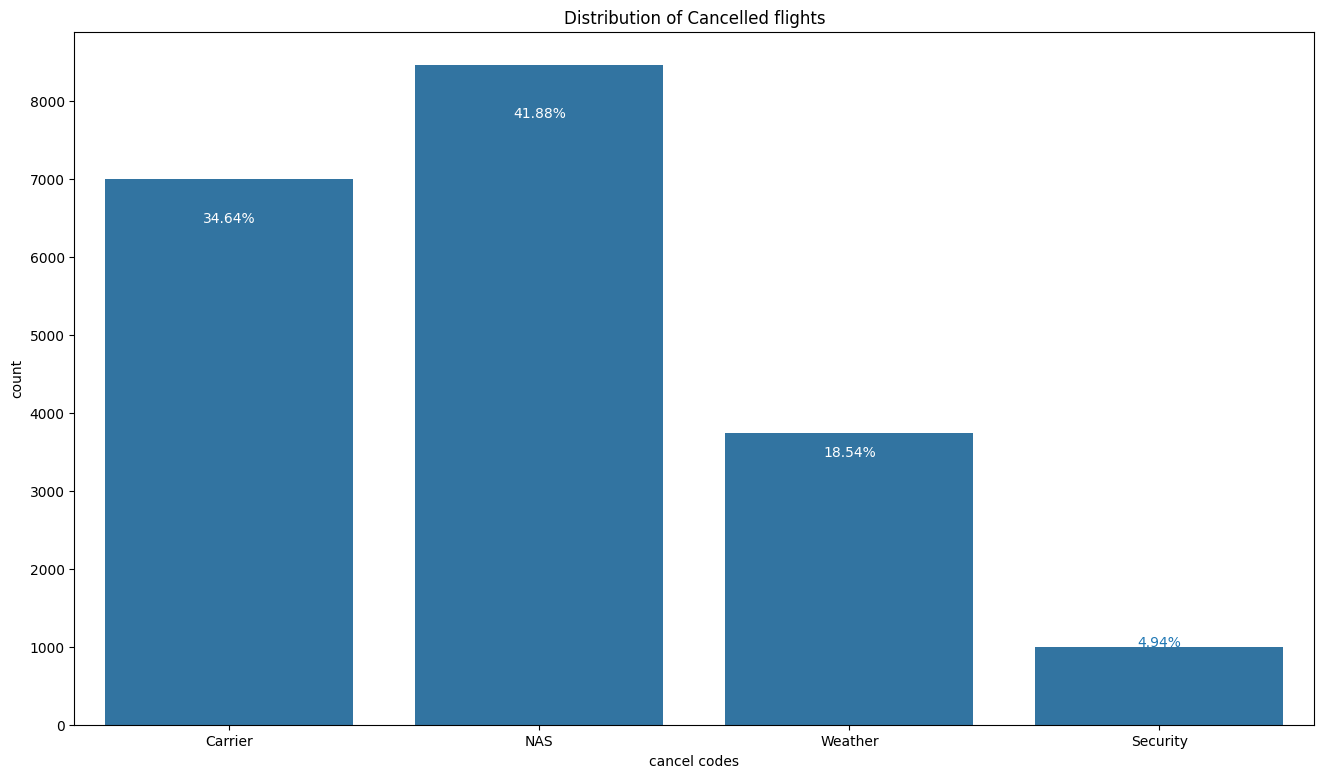

In [9]:
plt.figure(figsize=(16, 9))
base_color = sb.color_palette()[0]
# df_cancelled = df.query('(Cancelled==1)')
sb.countplot(data=Flights_df, x='CancellationCode', color=base_color)
# add annotations
gen_counts = Flights_df['CancellationCode'].value_counts()
# take proportion only out of Cancelled flights, not total dataframe
n_points = gen_counts.sum()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.2f}%'
    # print the annotation just below the top of the bar
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'w')
    else:
        plt.text(loc, 1000, pct_string, ha = 'center', color = base_color)

cancel_codes = ['Carrier', 'NAS', 'Weather', 'Security']
plt.xticks(locs, cancel_codes)
plot_label('Distribution of Cancelled flights',"cancel codes","count")


Most of the flights (41.88%) were cancelled due to National Air System (NAS) followed by Carrier  reasons (34.64%).

Security reasons account the negligible proportion (4.94%) of cancelled flights.

#### Delayed flights
A flight is considered delayed if its (arrival) delay is over 15 minutes (inclusive).

How the various delays such as Arrival delay are distributed?

What are the major reasons for delayed flights?

In [10]:
# get delayed flights
delayed_flights = Flights_df[Flights_df['ArrDelay']>=15]

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7488\1502142360.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[i, 1].set_xlim(0,360)


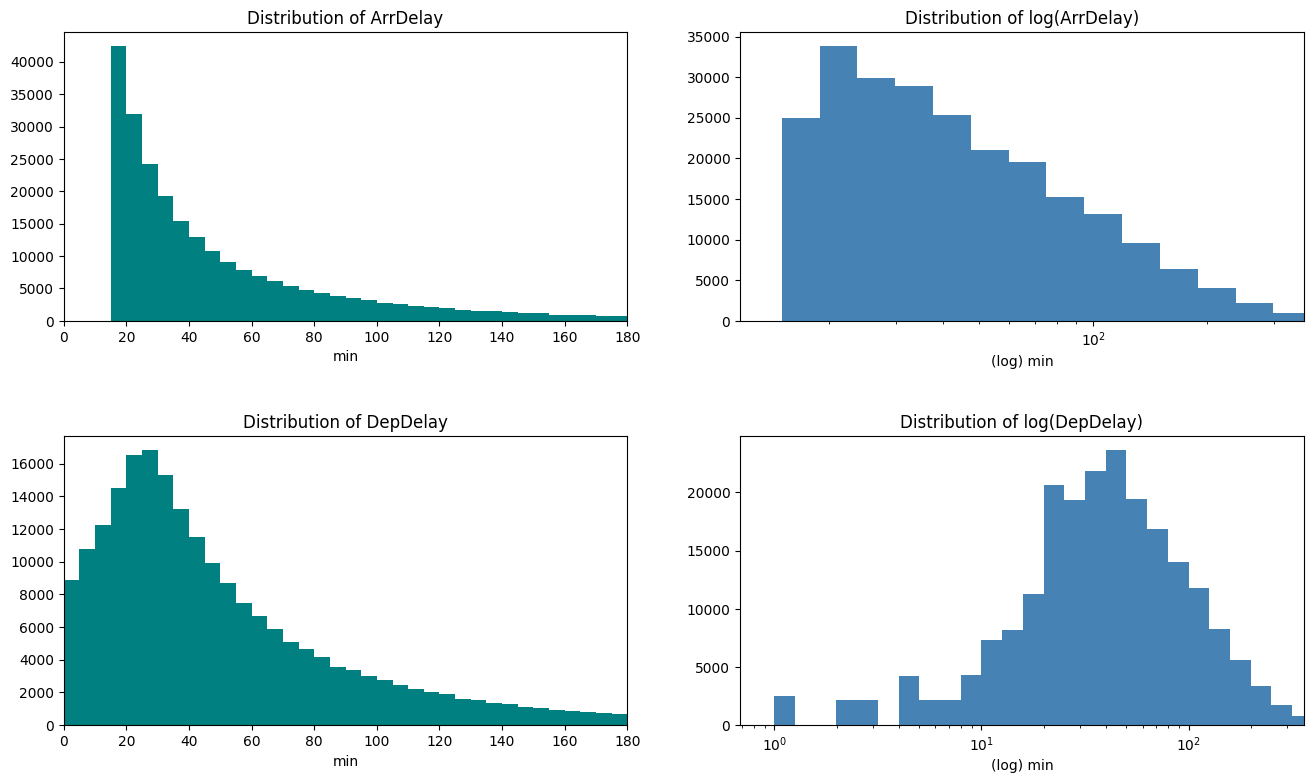

In [11]:
f, ax = plt.subplots(2, 2, figsize=(16, 9))
f.subplots_adjust(hspace=0.4)

for i, j in enumerate(['ArrDelay', 'DepDelay']):
    binsize=5
    data = delayed_flights[delayed_flights[j]>0]
    bin_edges = np.arange(0, data[j].max()+binsize, binsize)
    ax[i, 0].hist(data[j], bins = bin_edges, color='teal')
    ax[i, 0].set_xlabel('min')
    ax[i, 0].set_title(f'Distribution of {j}')
    ax[i, 0].set_xlim(0,180)

    # figure right
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[j].min()), np.log10(data[j].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = j, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('(log) min')
    ax[i, 1].set_title(f'Distribution of log({j})');

Though both the distributions are right skewed, the distribution of Departure delay is more closer to normal distribution than that of Arrival delay.

 Even the log distribution of Arrival delay is right skewed.

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_7488\1664514635.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[i, 1].set_xlim(0,360)


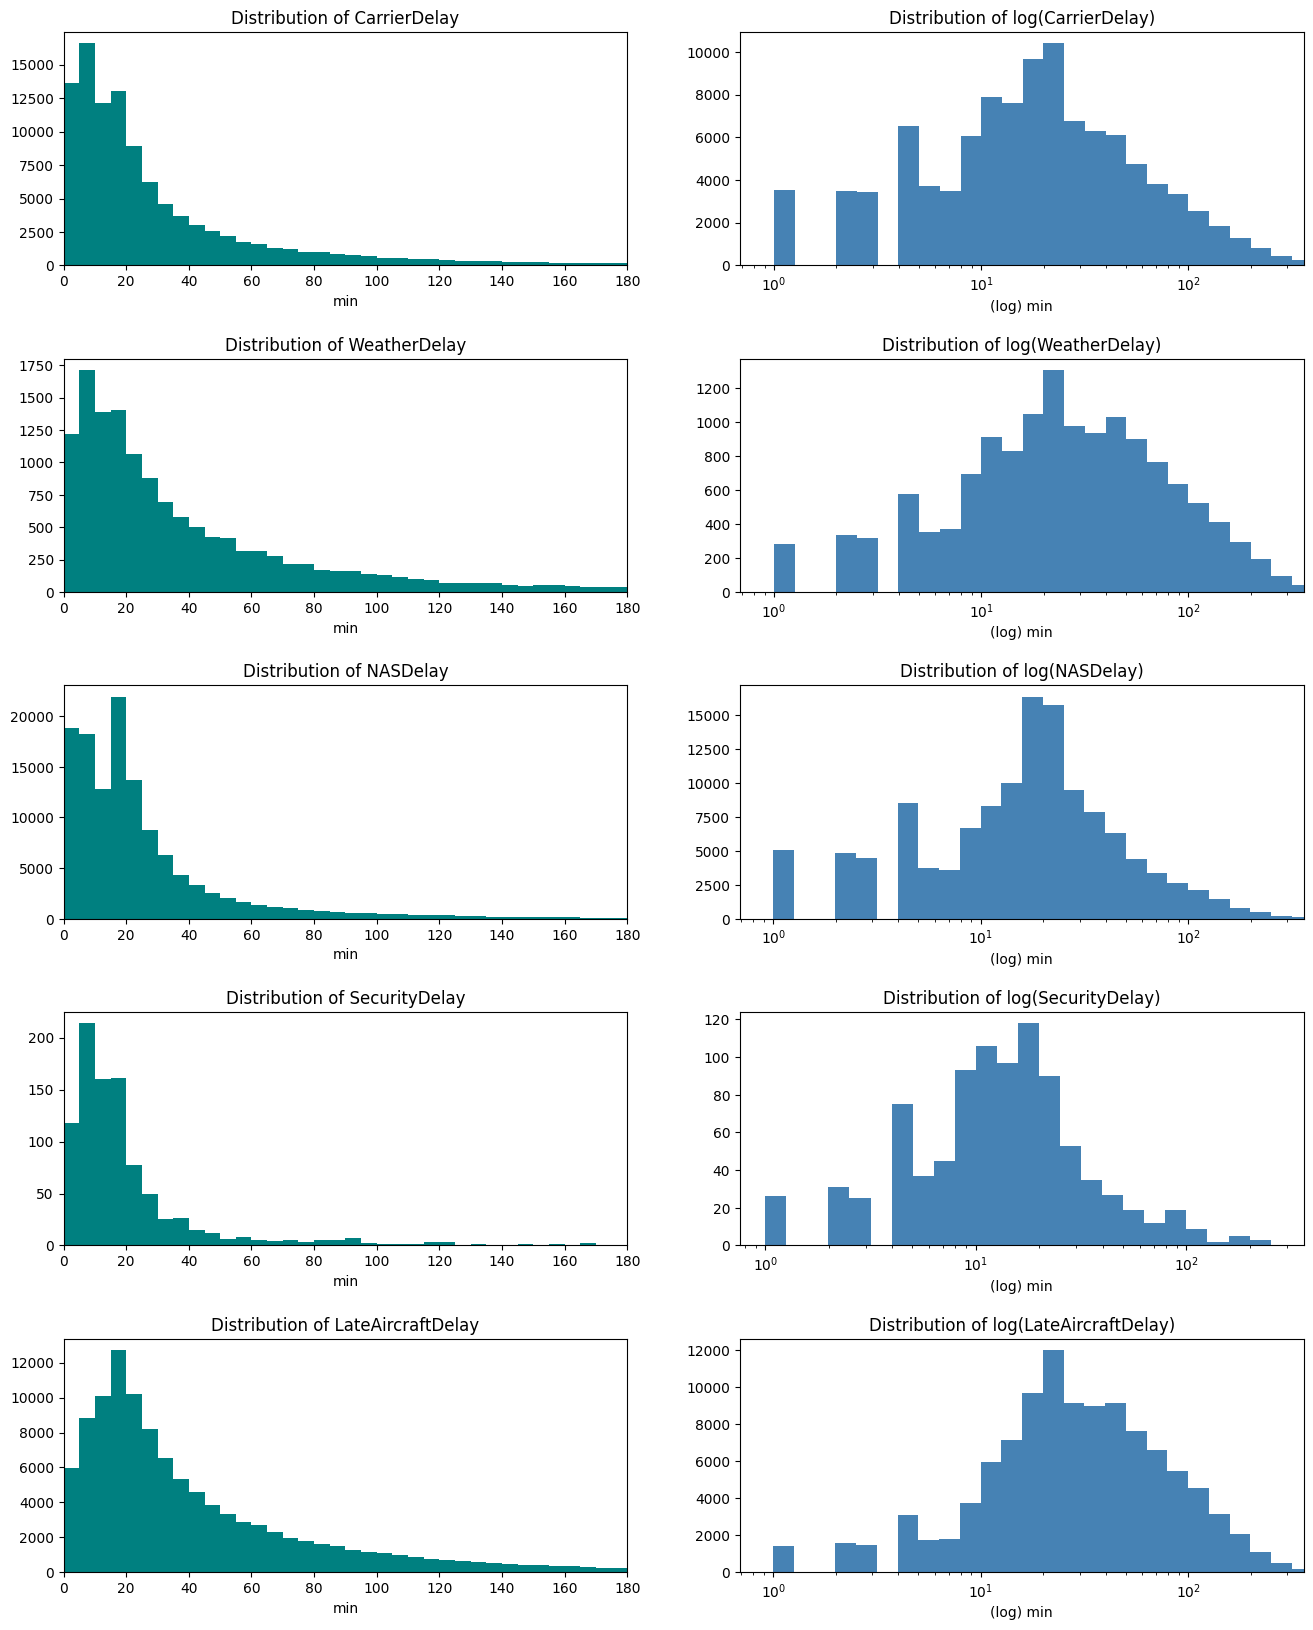

In [12]:
f, ax = plt.subplots(5, 2, figsize=(16, 20))
f.subplots_adjust(hspace=0.4)

for i, j in enumerate(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']):
    binsize=5
    data = delayed_flights[delayed_flights[j]>0]
    bin_edges = np.arange(0, data[j].max()+binsize, binsize)
    ax[i, 0].hist(data[j], bins = bin_edges, color='teal')
    ax[i, 0].set_xlabel('min')
    # remove more than 3hr delay
    ax[i, 0].set_xlim(0,180)
    ax[i, 0].set_title(f'Distribution of {j}')

    # figure right
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[j].min()), np.log10(data[j].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = j, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    # remove more than 6hr delay
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('(log) min')
    ax[i, 1].set_title(f'Distribution of log({j})')

There doesn't seem to be any discrepancy in the shape of delay distribution for different variables. Also, the distribution of Security delay is the narrowest.

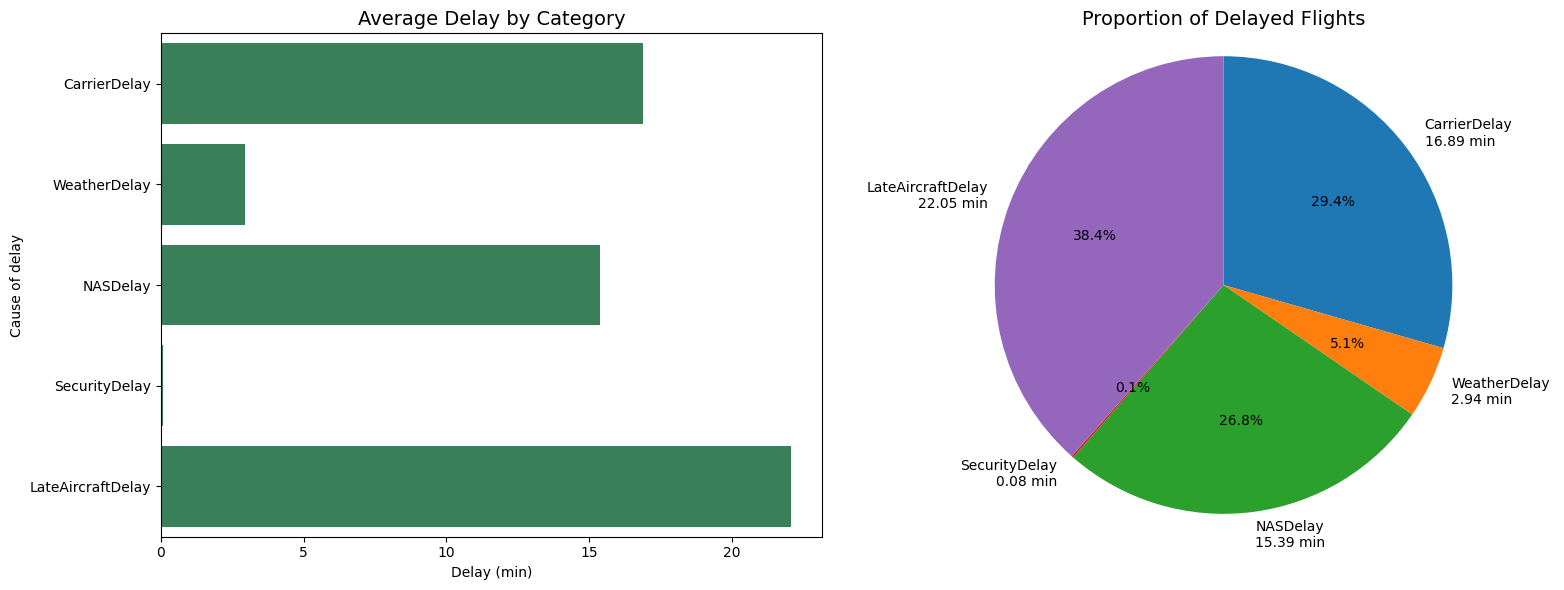

In [13]:
# Create the figure
plt.figure(figsize=(16, 6))

# Subplot 1: Bar plot for average delay by category
plt.subplot(1, 2, 1)
# Calculate the means for each delay type
means = [delayed_flights[i].mean() for i in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
# Plot the barplot
sb.barplot(x=means, y=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], color='seagreen')
plt.xlabel('Delay (min)')
plt.ylabel('Cause of delay')
plt.title('Average Delay by Category', fontsize=14)

# Subplot 2: Pie chart for the proportion of delay causes
plt.subplot(1, 2, 2)
labels = [f'{j}\n{means[i]:.2f} min' for i, j in enumerate(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])]
plt.pie(means, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.title('Proportion of Delayed Flights', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


The maximum proportion (38.4%) of delay is caused by Late Aircraft. The Late Aircraft delay also causes the maximum average delay (~22min).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Following points were noted in univariate exploration:
- ATL is the busiest airport having 5.9% of total flights.

- WN airline has the maximum flights (17.8%) followed by DL (11.4%).

- 2007 and 2019 has the most flights. while 2020 have the lowest flights may it becuse of covid 19.

- Minimum number of flights seems to be on 31st, but this is biased as only half of the months contains 31 days. Except on 29th, 30th and 31st, the number of flights is approximately same.

- As shown in the Number of flights per DayOfWeek graph, Saturday (label 6) followed by Sunday (label 7) has the minimum number of flights.

- Out of 1.2 million flights from Jan 2000 to Apr 2024, 23k flights (1.86%) were cancelled.

- Most of the flights (41.88%) were cancelled due to National Air System (NAS) followed by Carrier  reasons (34.64%).

- Security reasons account the negligible proportion (4.94%) of cancelled flights.
- Though both the distributions are right skewed, the distribution of Departure delay is more closer to normal distribution than that of Arrival delay.
Even the log distribution of Arrival delay is right skewed.

- There doesn't seem to be any discrepancy in the shape of delay distribution for different variables. Also, the distribution of Security delay is the narrowest.

- The maximum proportion (38.4%) of delay is caused by Late Aircraft. The Late Aircraft delay also causes the maximum average delay (~22min).



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All the explored variables showed normal results. Following operations were performed.
- The year-wise data of 2006, 2007, and 2008 was combined into a single csv file.
- Some of the variables such as ArrTime and DepTime were converted from hh:mm format to datetime (min) format.
- Since a flight is considered delayed if its (arrival) delay is over 15 minutes (inclusive), I created a subset of the original dataframe containing delayed flights.

## Bivariate Exploration


- How are cancelled and delayed flights distributed by year, month and day?
- What are the worst month to travel?
- Which airline has the maximum proportion of cancelled and delayed flights and what are the reasons of cancellation or delay?
- Is there correlation among different types of delays?
- What factor causes the longest delays?
- Which airport has the maximum delayed flights?

## Cancelled flights


c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

Text(0.5, 0.98, 'Distribution of Cancelled flights by Year and DayOfWeek')

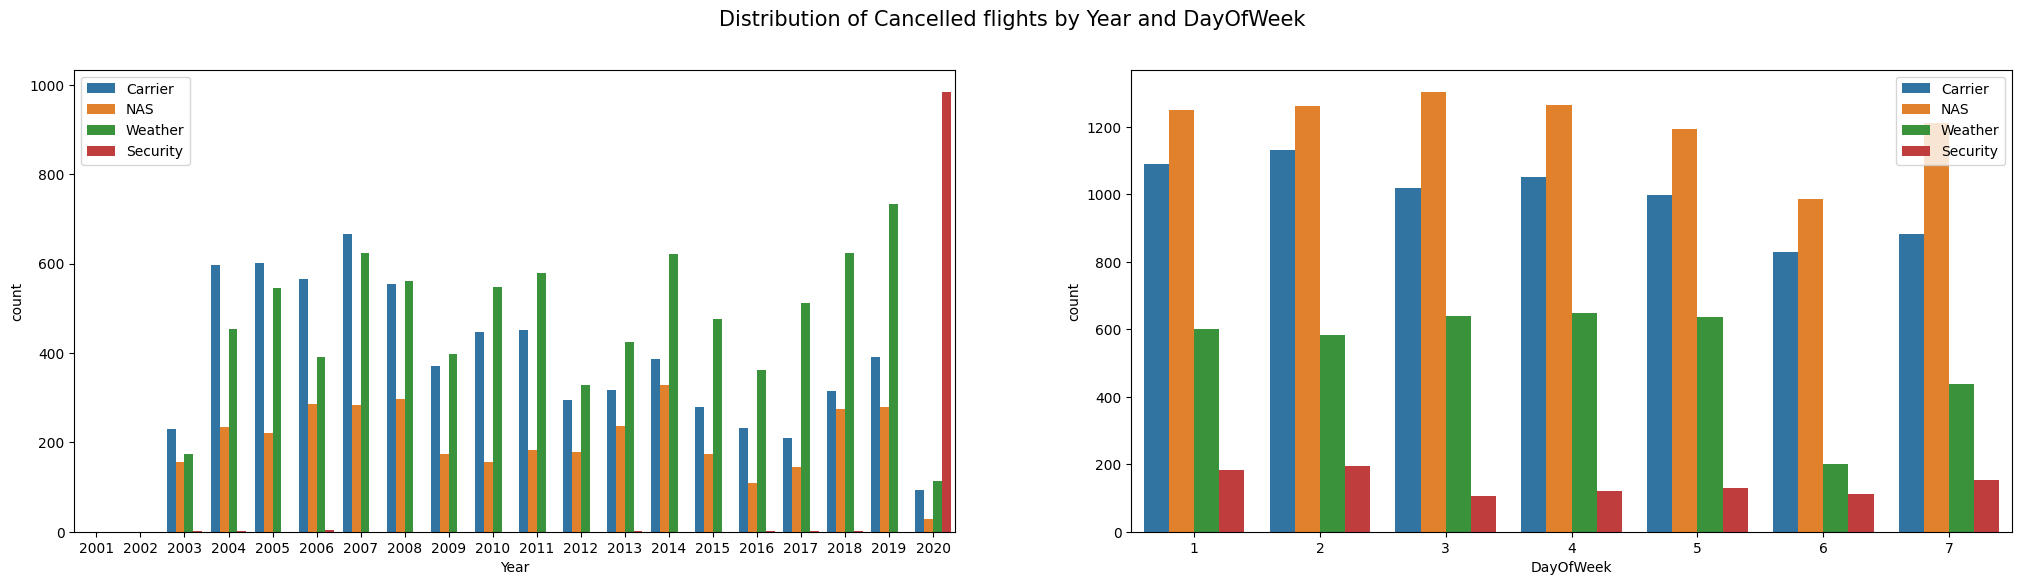

In [14]:
f, ax = plt.subplots(1, 2, figsize=(25, 6))
sb.countplot(data=Flights_df, x='Year', hue='CancellationCode', ax=ax[0])
sb.countplot(data=Flights_df, x='DayOfWeek', hue='CancellationCode', ax=ax[1])
ax[0].legend(['Carrier', 'NAS', 'Weather', 'Security'])
ax[1].legend(['Carrier', 'NAS', 'Weather', 'Security'])
f.suptitle('Distribution of Cancelled flights by Year and DayOfWeek', size=15)

- The biggest reason for the flights to be cancelled is the National Air System causes followed by Carrier causes.
- The most of flights cancelled in 2020 for security causes (covid 19).


Text(0.5, 0.98, 'Distribution of Cancelled flights by Month')

<Figure size 1600x600 with 0 Axes>

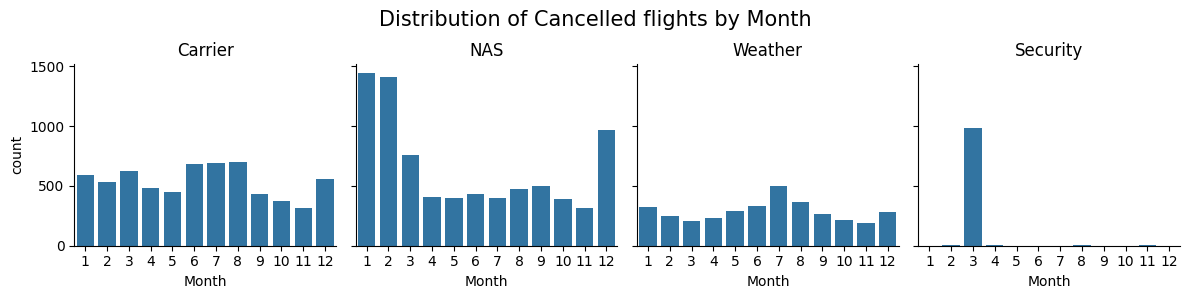

In [15]:
plt.figure(figsize=(16, 6))
# facetgrid by CancellationCode (removing 2008 year as it contains data of first 4 months only)
g = sb.FacetGrid(data = Flights_df[Flights_df['Year']!=2008], col = 'CancellationCode')
g = g.map(sb.countplot, 'Month', order=[1,2,3,4,5,6,7,8,9,10,11,12])
# set axes title
ax = g.axes.flatten()
for i, code in enumerate(['Carrier', 'NAS', 'Weather', 'Security']):
    ax[i].set_title(code)
plt.subplots_adjust(top=0.8)
plt.suptitle('Distribution of Cancelled flights by Month', size=15)

Jan and Feb are the worst month to travel having maximum proportion of delays due to NAS.

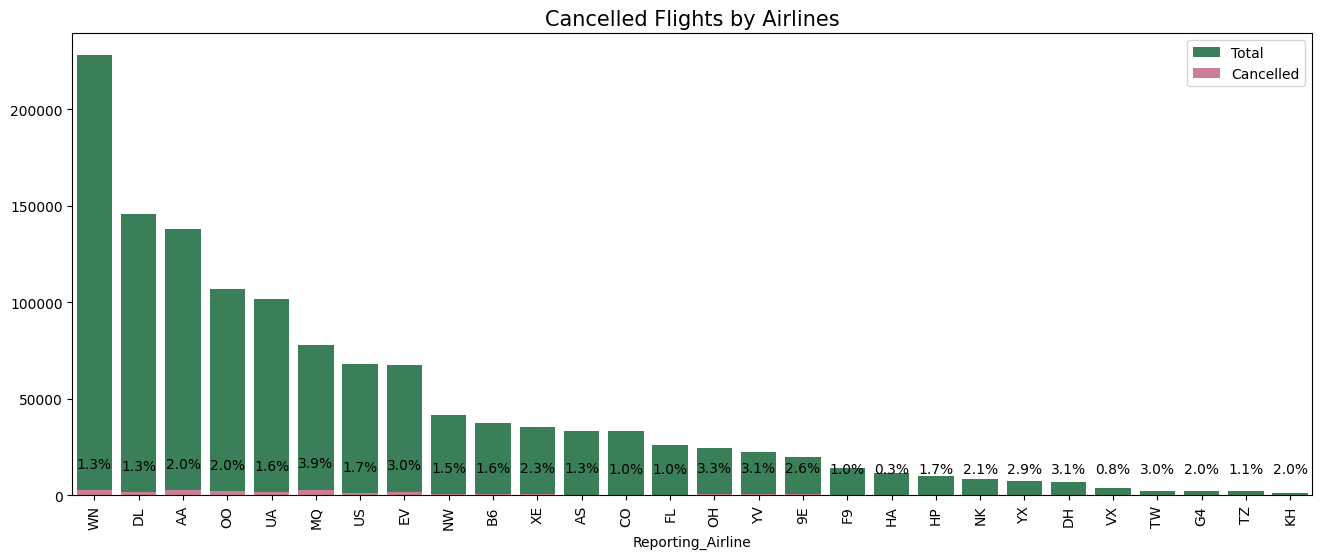

In [16]:
plt.figure(figsize=(16, 6))

# Count of total and cancelled flights by airline
gen_counts = Flights_df['Reporting_Airline'].value_counts()
cancelled_gen_counts = Flights_df[Flights_df['Cancelled'] == 1]['Reporting_Airline'].value_counts()

# Base color for total flights
base_color = 'seagreen'

# Plot total flights
sb.barplot(x=gen_counts.index, y=gen_counts.values, color=base_color, label='Total')

# Plot cancelled flights on the same axes
sb.barplot(x=cancelled_gen_counts.index, y=cancelled_gen_counts.values, color='palevioletred', label='Cancelled')

# Get current tick locations and labels
locs, labels = plt.xticks()

# Loop through each pair of locations and labels to add annotations
for loc, label in zip(locs, labels):
    label_text = label.get_text()
    if label_text in gen_counts.index:
        count = gen_counts[label_text]
        cancelled_count = cancelled_gen_counts.get(label_text, 0)  # Use get to handle missing values
        if count > 0:
            pct_string = f'{100 * cancelled_count / count:0.1f}%'
            # Print the annotation just above the top of the cancelled bar
            plt.text(loc, cancelled_count + 0.05 * gen_counts.max(), pct_string, ha='center', color='black')

# Add legend and title
plt.legend()
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.title('Cancelled Flights by Airlines', fontsize=15)

# Display the plot
plt.show()


- The WN airline has the highest number of flights and MQ airline has the highest proportion of cancelled flights (3.9%).
- Though DH and TW airline has less flights than many other airlines, it cancelled 3.1% and 3.0% of its flights.

c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

Text(0.5, 1.0, 'Cancelled flights by Airlines by category')

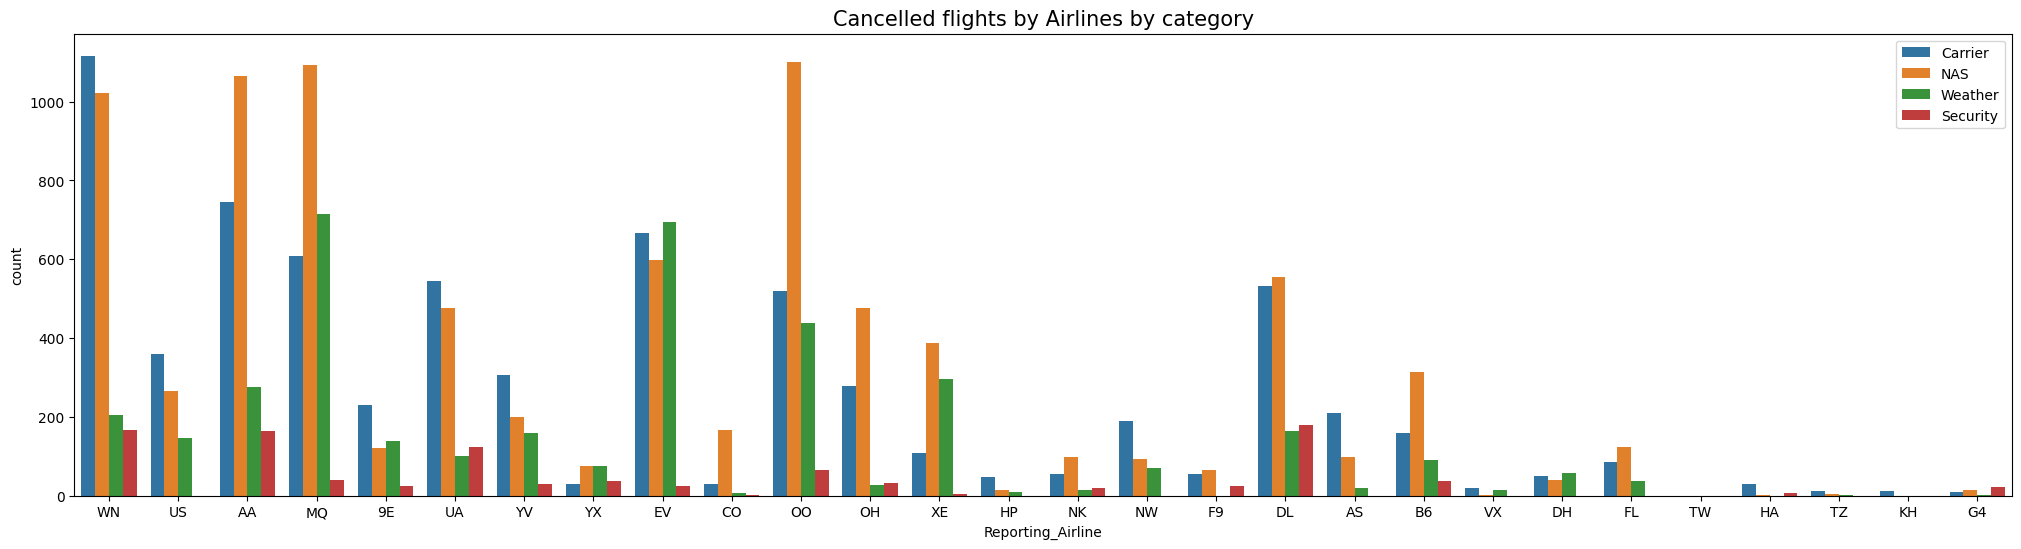

In [17]:
plt.figure(figsize=(25, 6))
sb.countplot(data=Flights_df[Flights_df['Cancelled']==1], x='Reporting_Airline', hue='CancellationCode')
plt.legend(['Carrier', 'NAS', 'Weather', 'Security'])
plt.title('Cancelled flights by Airlines by category', fontsize=15)

- Most of OO airline's flights were cancelled due to NAS reasons.


### Delayed flights



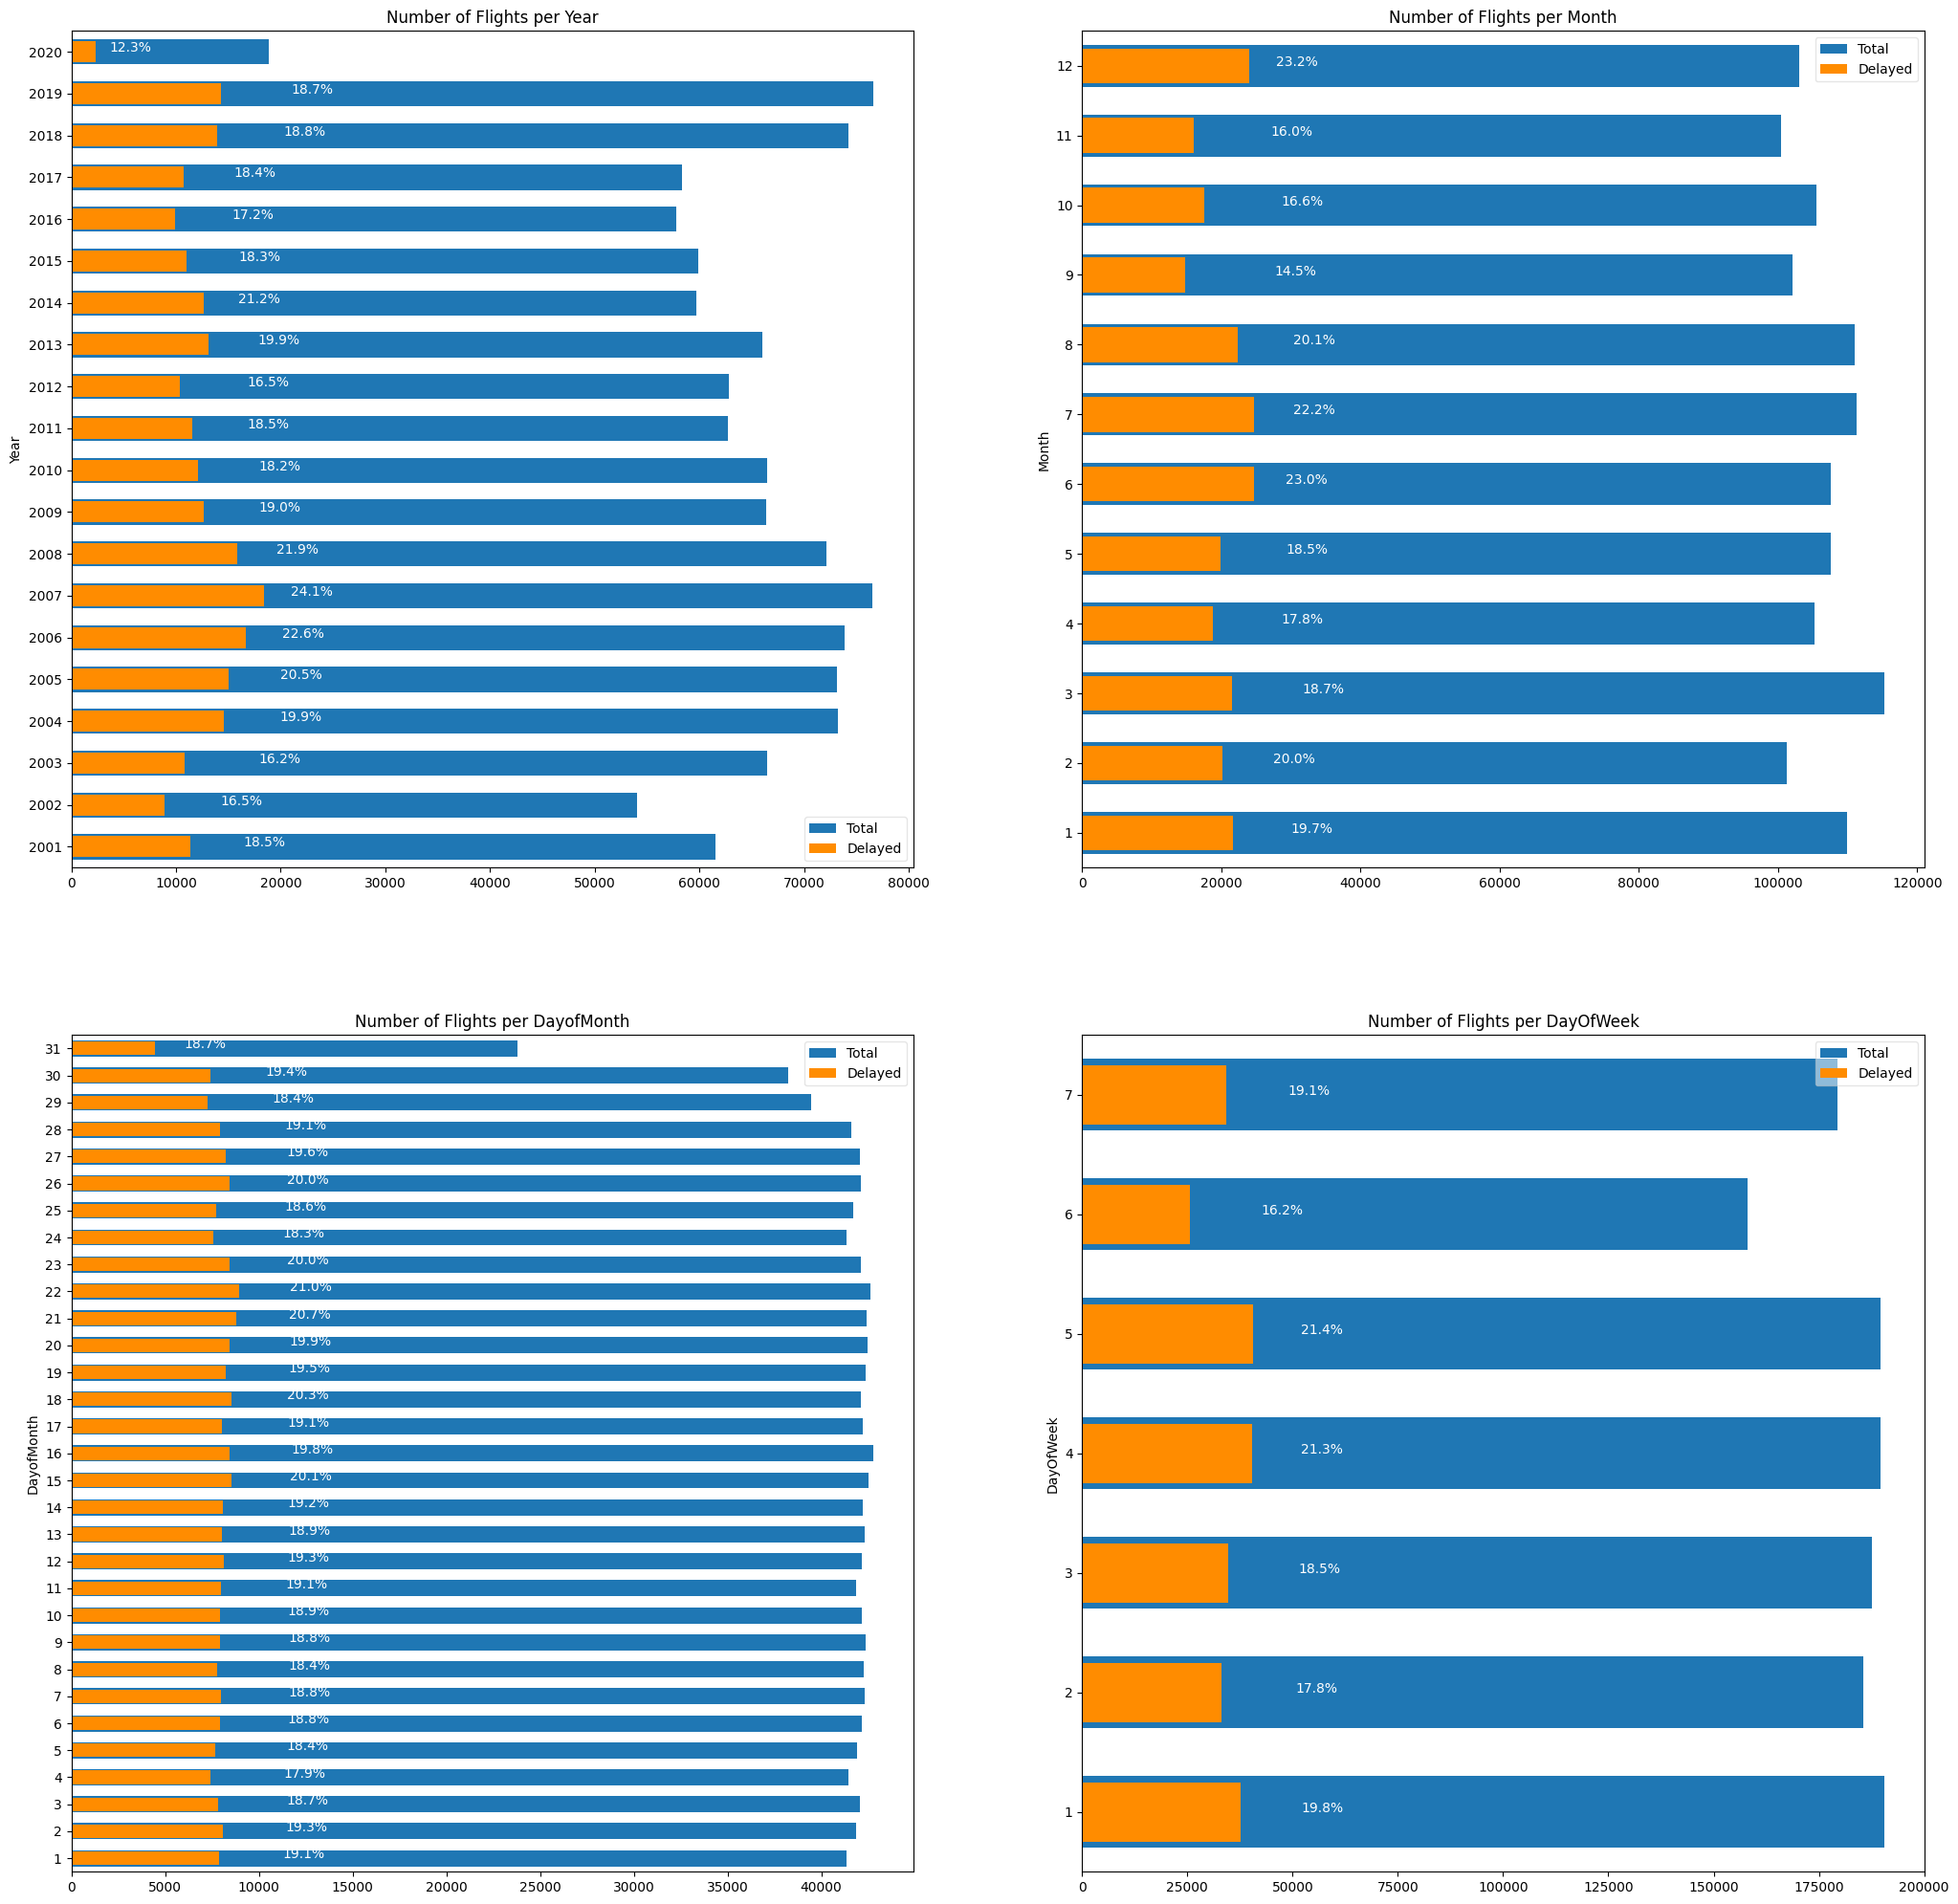

In [18]:
plt.figure(figsize=(25, 25))
f.subplots_adjust(hspace=0.6)
base_color = sb.color_palette()[0]
n_points = Flights_df.shape[0]
for i, j in enumerate(['Year', 'Month', 'DayofMonth', 'DayOfWeek']):
    plt.subplot(2, 2, i+1)

    # get counts of total and delayed flights
    gen_counts = Flights_df[j].value_counts()
    delayed_gen_counts = delayed_flights[j].value_counts()

    # plot stacked bar charts (reindex or use barplot's order)
    gen_counts.sort_index().plot.barh(label='Total', width=.6)
    delayed_gen_counts.sort_index().plot.barh(label='Delayed', color='darkorange')

    locs, labels = plt.yticks() # get the current tick locations and labels
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = gen_counts[int(label.get_text())]
        delayed_count = delayed_gen_counts[int(label.get_text())]
        pct_string = f'{100*delayed_count/count:0.1f}%'
        # print the annotation just below the top of the bar
        plt.text(0.30*count, loc, pct_string, ha = 'center', color = 'w')
    plt.legend(framealpha = 0.5, fancybox=True)
    plt.title(f'Number of Flights per {j}')

- On Friday, the maximum proportion (21.4%) of flights were delayed.
- December has 23.2% (maximum) of flights delayed.
- The minimum flights take place on Saturday.

Text(0.5, 0.98, 'Correlation b/w delays')

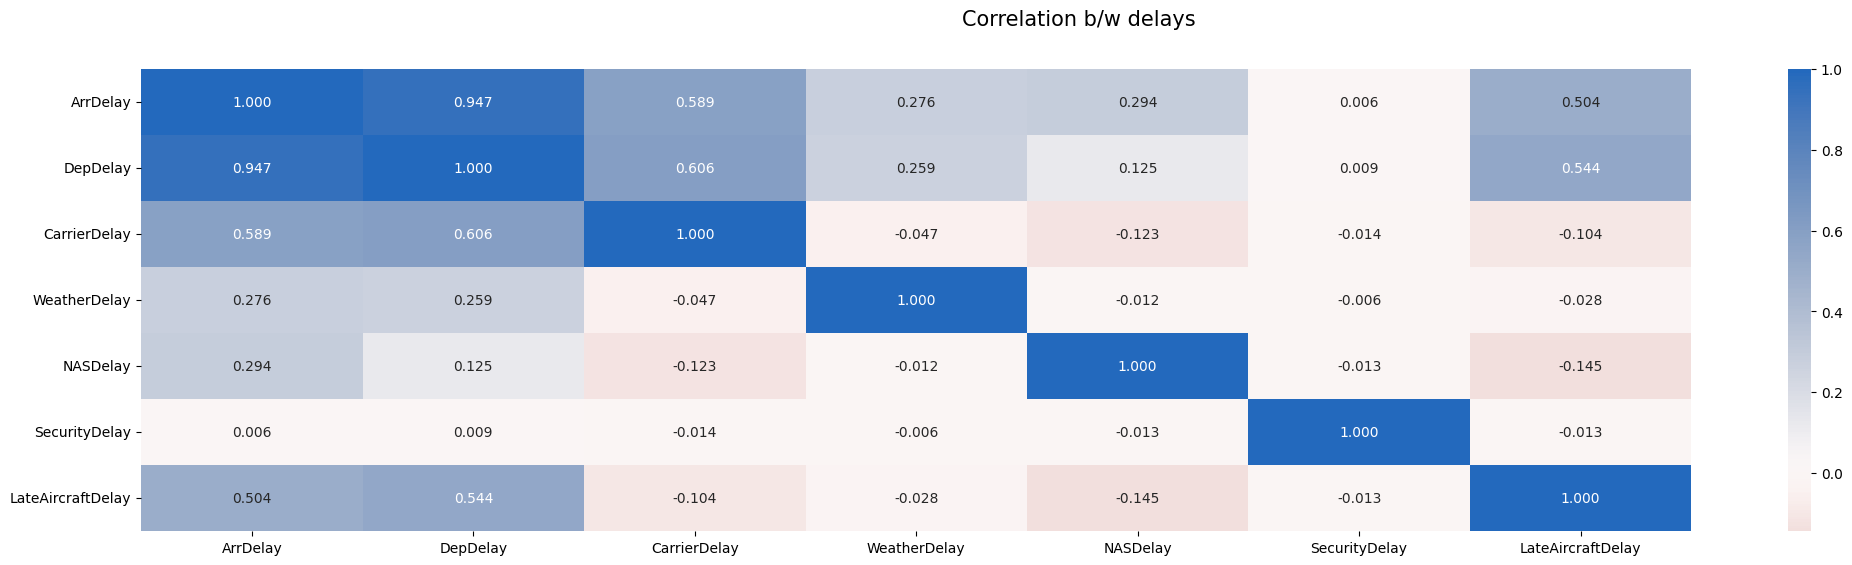

In [19]:
plt.figure(figsize=(25, 6))
sb.heatmap(delayed_flights[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.suptitle('Correlation b/w delays', size=15)

In [20]:
MELTS_COLUMNS = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
STAY_COLUMNS = [x for x in delayed_flights.columns.tolist() if x not in MELTS_COLUMNS]
delayed = pd.melt(delayed_flights, id_vars=STAY_COLUMNS, value_vars=MELTS_COLUMNS, var_name='CauseDelay', value_name='Delay')
delayed = delayed[delayed.Delay>0] # subset with causes delays time > 0 minutes
delayed['CauseDelay'] = delayed['CauseDelay'].str[:-5] # remove the ending 'Delay' from 'Cause' strings
delayed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354741 entries, 3 to 1231236
Columns: 106 entries, Year to Delay
dtypes: float64(68), int64(18), object(20)
memory usage: 289.6+ MB


c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Arrival Delay by Cause')

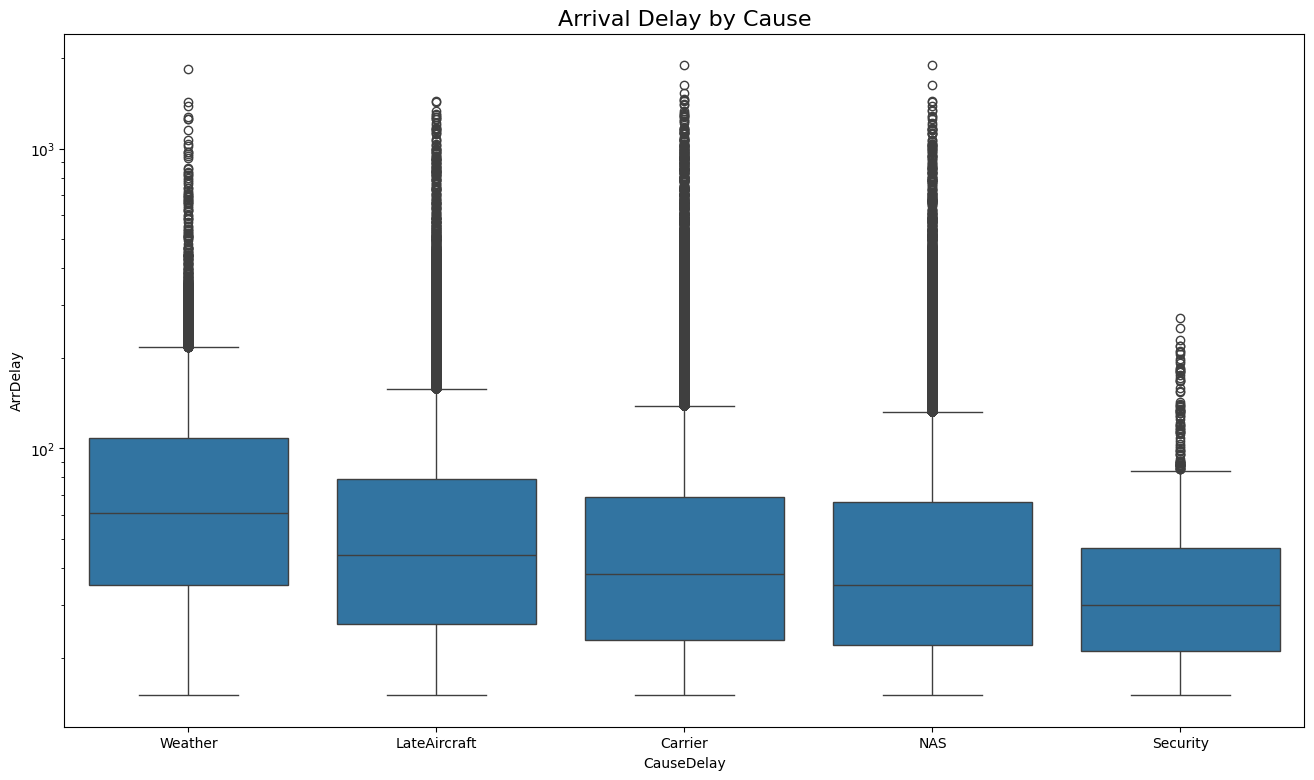

In [21]:
plt.figure(figsize=(16, 9))
order = delayed.groupby('CauseDelay')['ArrDelay'].median().sort_values(ascending=False).index
sb.boxplot(data=delayed, x='CauseDelay', y=delayed['ArrDelay'], order=order)
plt.yscale('log')
plt.title('Arrival Delay by Cause', fontsize=16)

Weather and Security causes have the the highest and the lowest delay respectively.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Following points were noted in bivariate exploration:
- The biggest reason for the flights to be cancelled is the National Air System causes followed by Carrier causes.
- The most of flights cancelled in 2020 for security causes (covid 19).
- Jan and Feb are the worst month to travel having maximum proportion of delays due to NAS.
- The WN airline has the highest number of flights and MQ airline has the highest proportion of cancelled flights (3.9%).
- Though DH and TW airline has less flights than many other airlines, it cancelled 3.1% and 3.0% of its flights.
- Most of OO airline's flights were cancelled due to NAS reasons.
- On Friday, the maximum proportion (21.4%) of flights were delayed.
- December has 23.2% (maximum) of flights delayed.
- The minimum flights take place on Saturday.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The minimum flights take place on Saturday.

## Multivariate Exploration


What is the relation between Arrival delay and delay causes per airline?

c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = group

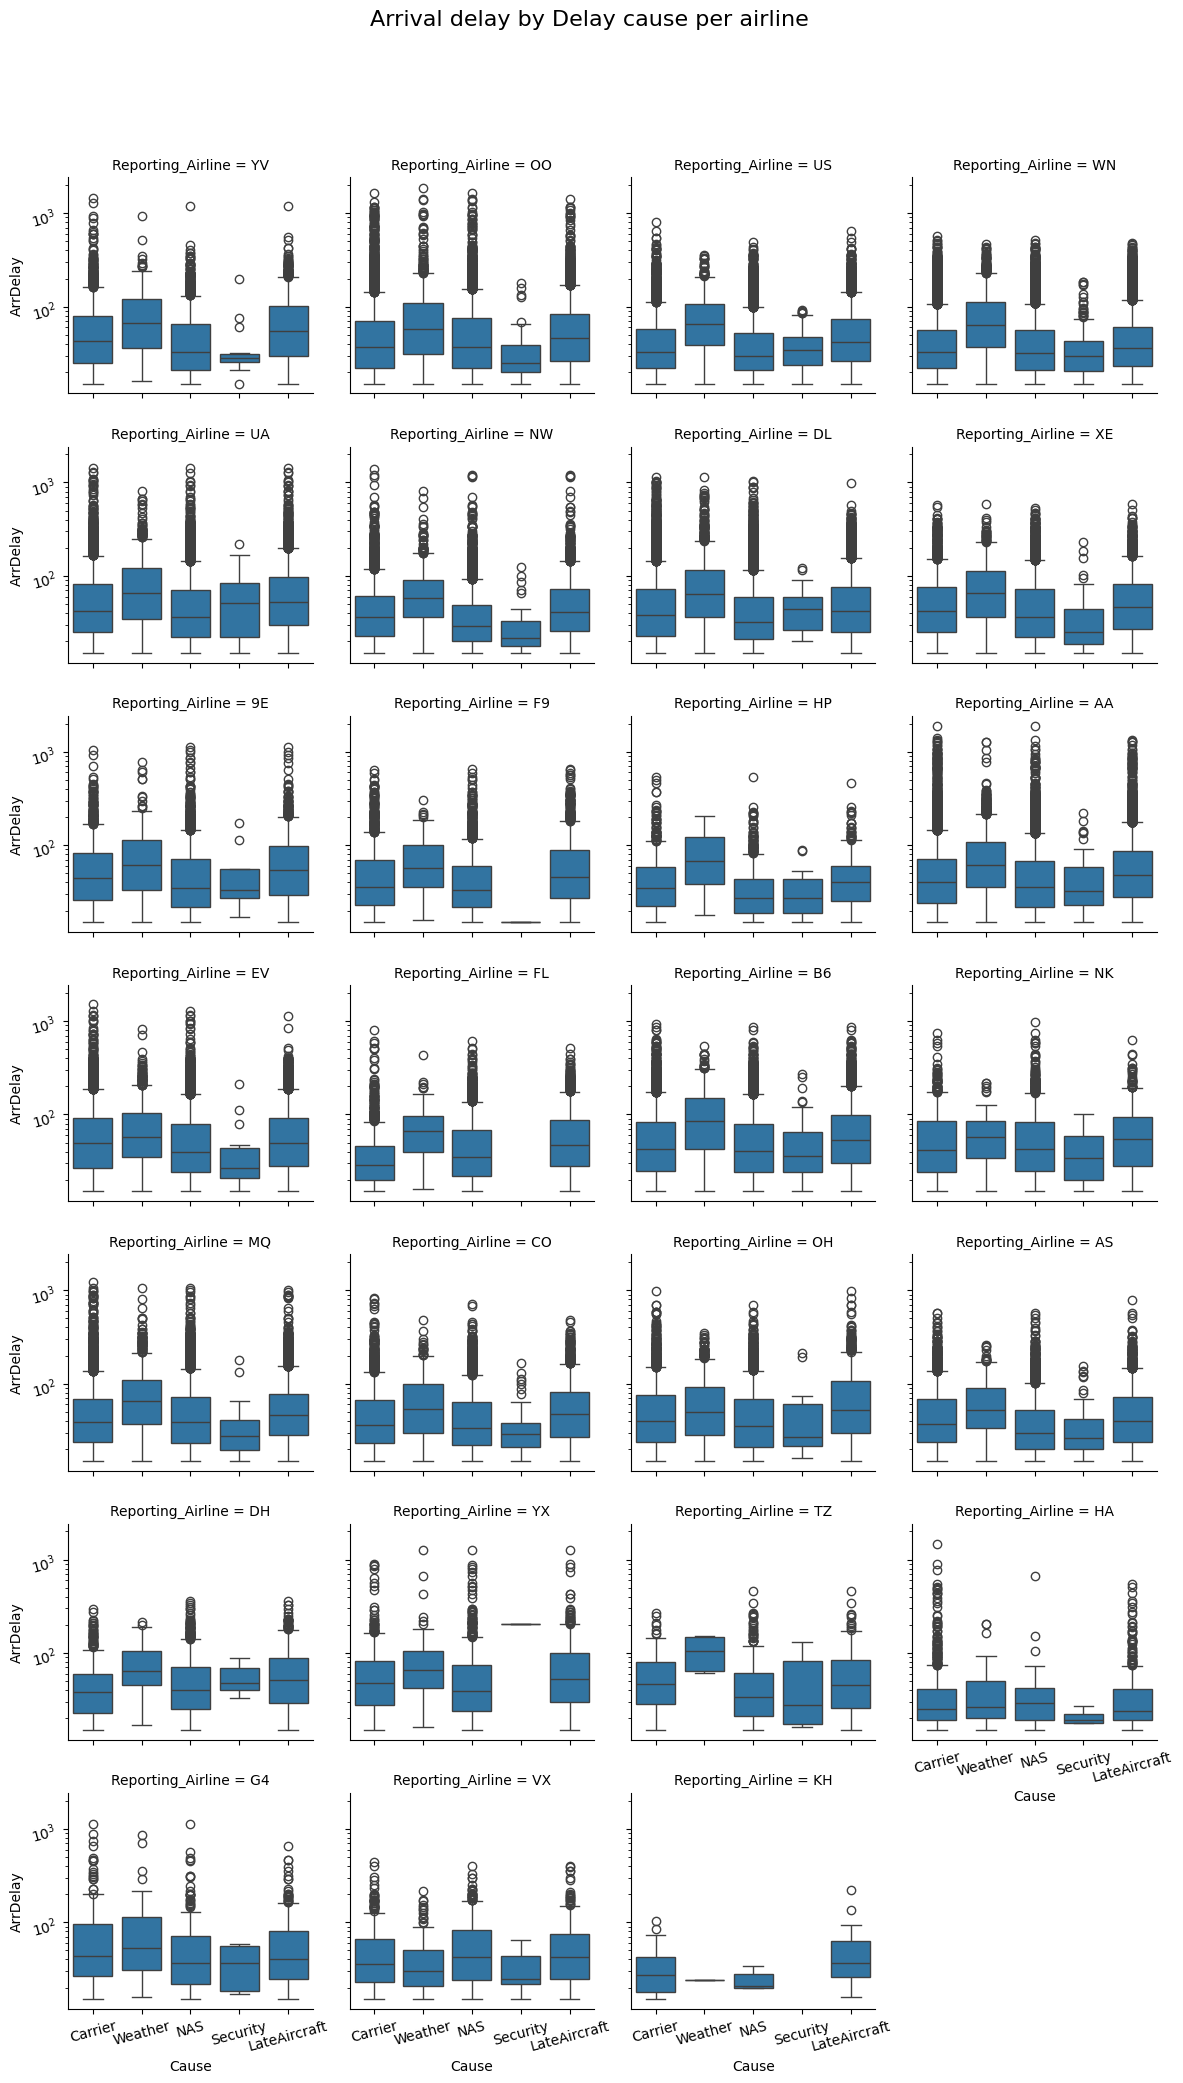

In [22]:
g = sb.FacetGrid(data=delayed, col='Reporting_Airline', col_wrap=4)
g.map(sb.boxplot, 'CauseDelay', 'ArrDelay')
plt.yscale('log')
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival delay by Delay cause per airline', size=16)

# set_facet_title()

# # Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.tick_params(rotation=15)
    ax.set_xlabel('Cause')

- For majority of the airlines, Bad Weather and Late Aircraft cause longer delays.
- All the airlines clearly have a lot of outliers (shown by dots outside the boxplot).

Text(0.5, 0.98, 'Arrival delay by Delay cause per airline')

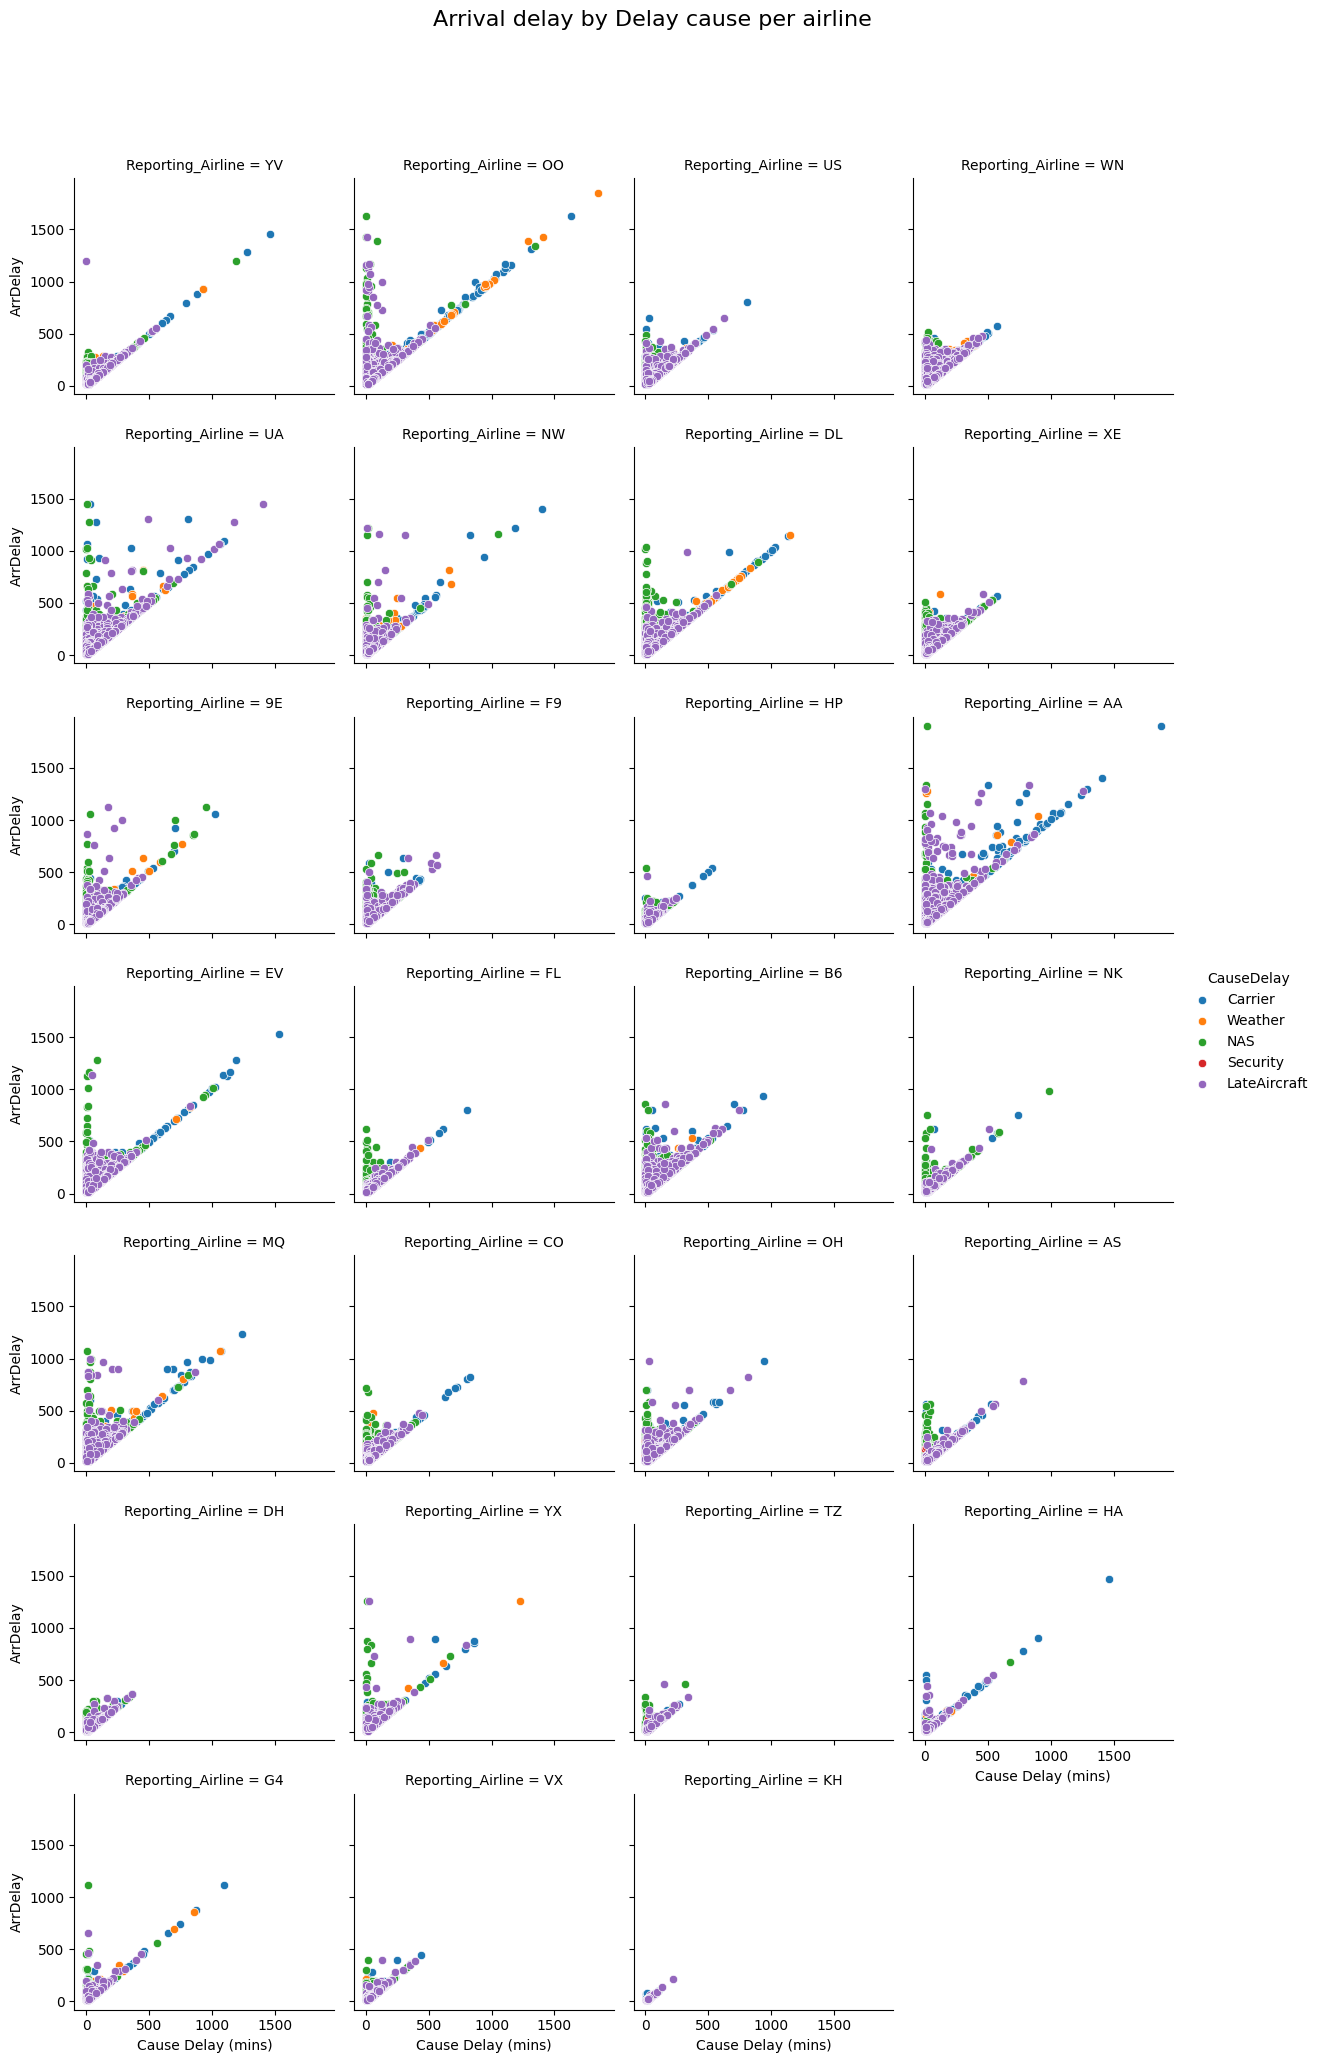

In [23]:
g = sb.FacetGrid(data=delayed, col = 'Reporting_Airline', col_wrap = 4, hue='CauseDelay')
g.map(sb.scatterplot, 'Delay', 'ArrDelay').add_legend()

# Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.set_xlabel('Cause Delay (mins)')
    
plt.subplots_adjust(top=0.9)
plt.suptitle('Arrival delay by Delay cause per airline', size=16)

- Late Aircraft seems to be the major factor for delays, but it might be biased as some of the data points are overshadowed. But based on the bivariate exploration, Late Aircraft is indeed the major delay factor.
- Most of the curve looks like V-shaped, where the diagonal line (right line of V) represents the positive relationship, and vertical line of V represents no correlation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Late Aircraft seems to be the major factor for delays, but it might be biased as some of the data points are overshadowed. But based on the bivariate exploration, Late Aircraft is indeed the major delay factor.
- For majority of the airlines, Bad Weather and Late Aircraft cause longer delays.
- All the airlines clearly have a lot of outliers (shown by dots outside the boxplot).

### Were there any interesting or surprising interactions between features?

- Most of the curve looks like V-shaped, where the diagonal line (right line of V) represents the positive relationship, and vertical line of V represents no correlation.

## Conclusions

This exploration of U.S. flight data provides insights into the patterns and factors contributing to flight delays. The analysis reveals that:

- Airports and Airlines: Certain airports, such as Atlanta (ATL), handle a significantly higher proportion of flights, which could impact the frequency and duration of delays. Similarly, specific airlines dominate the market, influencing the overall delay statistics.

- Flight Delays: By examining the arrival delays, we observe that various factors, including departure times, origin airports, and the operating airline, play crucial roles in determining delays. Understanding these patterns helps in identifying potential areas for improvement in airline operations.

- Data Structure: The dataset's structure, with over 1.2 million entries and more than 100 features, provides a comprehensive view of the flight data, though careful selection of relevant features is necessary for effective analysis.

Future investigations could delve deeper into the relationships between these factors and explore additional variables that may affect delays, such as weather conditions and day-of-week patterns. These insights could guide both airlines and airports in improving punctuality and overall service quality.